# Before jumping to the code implementation
- 보시는 동영상에는 git을 사용하라고 말씀드리고 있는데, 각 주차마다 해당 ipynb파일만 다운받고 싶으면 wget이나 curl을 사용하여도 좋습니다. 
    - wget https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture1-Intro_bio_datamining_code_only.ipynb
    - curl https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture1-Intro_bio_datamining_code_only.ipynb --output Lecture1-Intro_bio_datamining_code_only.ipynb
<br><br><br>    
- 동영상과 같이 git clone을 사용하고 싶은 학생은 이번주차는 처음이라 상관없지만, 두 번째 주차부터는 git은 existing directory에는 clone을 하지 않으므로 디렉토리 (~/Documents/BioDataMining)를 지워주고 실행하여야 합니다. 
- Open the terminal and make a directory dedicated for this class code implementation (e.g., mkdir ~/Documents/BioDataMining)
- Install Git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Go to the directory for this class, and type: git clone https://github.com/COMBINE-SKKU/bio_data_mining.git
- If you are a newbie for programming a python and jupyter notebook, please install anaconda 
    - Window: https://problemsolvingwithpython.com/01-Orientation/01.03-Installing-Anaconda-on-Windows/
    - Mac: https://problemsolvingwithpython.com/01-Orientation/01.04-Installing-Anaconda-on-MacOS/
    - Linux: https://problemsolvingwithpython.com/01-Orientation/01.05-Installing-Anaconda-on-Linux/
- And learn how to open a jupyter notebook (https://www.youtube.com/watch?v=OJMILWh6ARY)
- Run the following codes.

# Install necessary python packages
- conda install matplotlib 
- conda install numpy
- conda install pandas
- conda isntall sklearn

You can also use 'pip install', if 'conda install' does not find corresponding packages. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model 
import os

In [4]:
import urllib.request
datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + datapath + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [5]:
# Load the data
# os.chdir("/content/datasets/lifesat") # colab을 사용하시는 분들은 이 라인의 #을 없애 directory를 변경해 주세요.
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")

In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [7]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

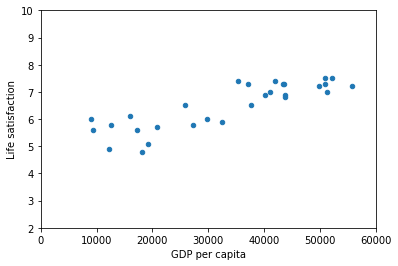

In [8]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.xlim(0, 60000)
plt.ylim(2, 10)
plt.show()

- Satisfaction seems to go up more or less linearly as the country's GDP per capita increase.
- So you decide to model life satisfaction as a linear function of GDP per capita. This step is called model selection.
<center><img src="Figure/Fig1-12.png" title="Equation" style="width:579px;height:63px;"></center>
<center><i>Equation 1. A simple Linear Model</i></center>

In [9]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(array([[4.91154459e-05]]), array([4.8530528]))

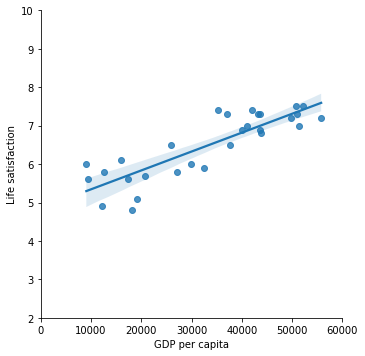

In [10]:
import seaborn as sns
g = sns.lmplot(x="GDP per capita", y='Life satisfaction', data=country_stats, fit_reg=True) 
g.set(xlim=(0, 60000))
g.set(ylim=(2, 10))

model.coef_, model.intercept_

In [11]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus's GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]
